## Classification Methods Example Usage

In [1]:
import os
from pathlib import Path
try:
    # '.' if the path is to current folder
    os.chdir(Path(os.path.join(os.getcwd(), '.')).parents[1])
    print(os.getcwd())
except:
    pass

/Users/sarahcameron/Documents/personal_git/classification-methods


In [2]:
import pandas as pd
import numpy as np
from methods.classification import Classification

In [3]:
file="./methods/data/iris_dataset.csv"
data = pd.read_csv(file, index_col=None)

## Subset the data to include only 2 species

In [4]:
data_sub=data[(data.Species=='Iris-setosa') | (data.Species=='Iris-virginica')]

In [5]:
data_sub

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Binary Classification
### Iris Setosa ==1 
### Iris Virginica==0

In [6]:
data_sub.loc[(data_sub['Species']=='Iris-setosa'),'classify']=1

/Users/sarahcameron/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sarahcameron/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
data_sub=data_sub.fillna(0)

### Check Distribution of Classes

In [8]:
setosa=len(data_sub[data_sub['classify']==1])/len(data_sub['classify'])
setosa*100

50.0

In [9]:
virginica=1-setosa
virginica*100

50.0

In [10]:
data_sub=data_sub.drop(columns=['Id','Species'])

In [11]:
t=Classification(data_sub, 'classify',split_level=10)

/Users/sarahcameron/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


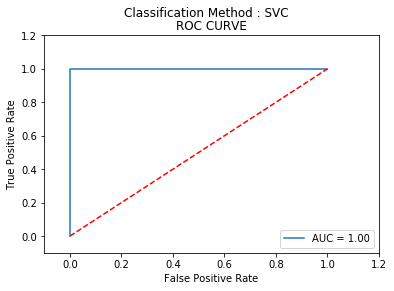

<Figure size 432x288 with 0 Axes>

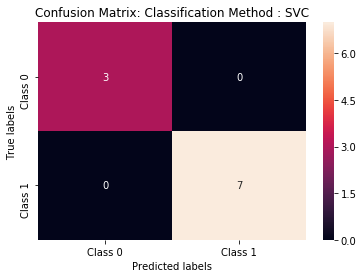

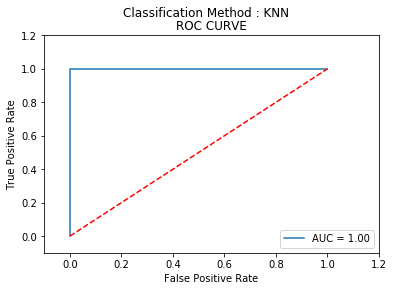

<Figure size 432x288 with 0 Axes>

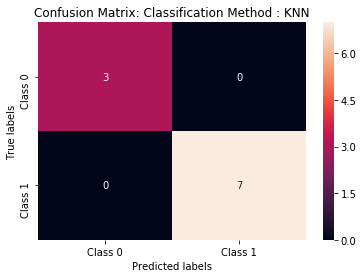

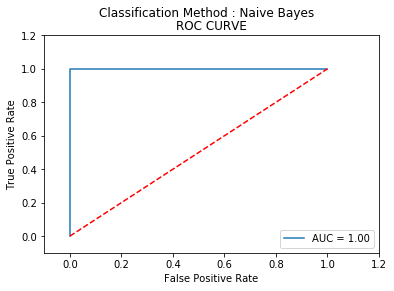

<Figure size 432x288 with 0 Axes>

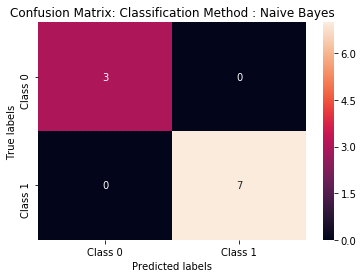

In [12]:
preds1, cm1, roc = t.svm
preds2, cm2, roc = t.KNN()
preds3, cm3, roc = t.GaussNB()